In [1]:
pip install -U fortran-magic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 21.0 MB/s eta 0:00:00


In [ ]:
%matplotlib inline
%load_ext fortranmagic

import sys; sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True

jan2017 = pd.to_datetime(['2017-01-03 00:00:00+00:00',
 '2017-01-04 00:00:00+00:00',
 '2017-01-05 00:00:00+00:00',
 '2017-01-06 00:00:00+00:00',
 '2017-01-09 00:00:00+00:00',
 '2017-01-10 00:00:00+00:00',
 '2017-01-11 00:00:00+00:00',
 '2017-01-12 00:00:00+00:00',
 '2017-01-13 00:00:00+00:00',
 '2017-01-17 00:00:00+00:00',
 '2017-01-18 00:00:00+00:00',
 '2017-01-19 00:00:00+00:00',
 '2017-01-20 00:00:00+00:00',
 '2017-01-23 00:00:00+00:00',
 '2017-01-24 00:00:00+00:00',
 '2017-01-25 00:00:00+00:00',
 '2017-01-26 00:00:00+00:00',
 '2017-01-27 00:00:00+00:00',
 '2017-01-30 00:00:00+00:00',
 '2017-01-31 00:00:00+00:00',
 '2017-02-01 00:00:00+00:00'])
calendar = jan2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-01-06 00:00:00+00:00',
                             '2017-01-07 00:00:00+00:00',
                             '2017-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])

<center>
  <h1>The PyData Toolbox</h1>
  <h3>Scott Sanderson (Twitter: @scottbsanderson, GitHub: ssanderson)</h3>
  <h3><a href="https://github.com/ssanderson/pydata-toolbox">https://github.com/ssanderson/pydata-toolbox</a></h3>
</center>

# About Me:

<img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/me.jpg" alt="Drawing" style="width: 300px;"/>

- Senior Engineer at [Quantopian](www.quantopian.com)
- Background in Mathematics and Philosophy
- **Twitter:** [@scottbsanderson](https://twitter.com/scottbsanderson)
- **GitHub:** [ssanderson](github.com/ssanderson)

## Outline

- Built-in Data Structures
- Numpy `array`
- Pandas `Series`/`DataFrame`
- Plotting and "Real-World" Analyses

# Data Structures

> Rule 5. Data dominates. If you've chosen the right data structures and organized things well, the algorithms
will almost always be self-evident. Data structures, not algorithms, are central to programming.

- *Notes on Programming in C*, by Rob Pike.

# Lists

In [ ]:
assert ran_the_first_cell, "Oh noes!"

NameError: ignored

In [ ]:
l = [1, 'two', 3.0, 4, 5.0, "six"]
l

[1, 'two', 3.0, 4, 5.0, 'six']

In [ ]:
# Lists can be indexed like C-style arrays.
first = l[0]
second = l[1]
print("first:", first)
print("second:", second)

first: 1
second: two


In [ ]:
# Negative indexing gives elements relative to the end of the list.
last = l[-1]
penultimate = l[-2]
print("last:", last)
print("second to last:", penultimate)

last: six
second to last: 5.0


In [ ]:
# Lists can also be sliced, which makes a copy of elements between
# start (inclusive) and stop (exclusive)
sublist = l[1:3]
sublist

['two', 3.0]

In [ ]:
# l[:N] is equivalent to l[0:N].
first_three = l[:3]
first_three

[1, 'two', 3.0]

In [ ]:
# l[3:] is equivalent to l[3:len(l)].
after_three = l[3:]
after_three

[4, 5.0, 'six']

In [ ]:
# There's also a third parameter, "step", which gets every Nth element.
l = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h']
l[1:7:2]

['b', 'd', 'f']

In [ ]:
# This is a cute way to reverse a list.
l[::-1]

['h', 'g', 'f', 'e', 'd', 'c', 'b', 'a']

In [ ]:
# Lists can be grown efficiently (in O(1) amortized time).
l = [1, 2, 3, 4, 5]
print("Before:", l)
l.append('six')
print("After:", l)

Before: [1, 2, 3, 4, 5]
After: [1, 2, 3, 4, 5, 'six']


In [ ]:
# Comprehensions let us perform elementwise computations.
l = [1, 2, 3, 4, 5]
[x * 2 for x in l]

[2, 4, 6, 8, 10]

## Review: Python Lists

- Zero-indexed sequence of arbitrary Python values.
- Slicing syntax: `l[start:stop:step]` copies elements at regular intervals from `start` to `stop`.
- Efficient (`O(1)`) appends and removes from end.
- Comprehension syntax: `[f(x) for x in l if cond(x)]`.

# Dictionaries

In [ ]:
# Dictionaries are key-value mappings.
philosophers = {'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}
philosophers

{'Bertrand': 'Russell', 'David': 'Hume', 'Immanuel': 'Kant'}

In [ ]:
# Like lists, dictionaries are size-mutable.
philosophers['Ludwig'] = 'Wittgenstein'
philosophers

{'Bertrand': 'Russell',
 'David': 'Hume',
 'Immanuel': 'Kant',
 'Ludwig': 'Wittgenstein'}

In [ ]:
del philosophers['David']
philosophers

{'Bertrand': 'Russell', 'Immanuel': 'Kant', 'Ludwig': 'Wittgenstein'}

In [ ]:
# No slicing.
philosophers['Bertrand':'Immanuel']

TypeError: unhashable type: 'slice'

## Review: Python Dictionaries

- Unordered key-value mapping from (almost) arbitrary keys to arbitrary values.
- Efficient (`O(1)`) lookup, insertion, and deletion.
- No slicing (would require a notion of order).

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pacino.gif" alt="Drawing" style="width: 100%;"/></center>


In [ ]:
4 * "a"

'aaaa'

In [1]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/gross.gif" alt="Drawing" style="width: 50%;"/></center>


In [ ]:
%%time

matmul(a, b)

CPU times: user 25 µs, sys: 0 ns, total: 25 µs
Wall time: 29.1 µs


[[5, 8, 11, 14], [8, 13, 18, 23], [17, 28, 39, 50], [3, 5, 7, 9]]

**My own example 0 - cpu info**

In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed bhi
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
ad

**My own example 1 - Changing in matmul(A, B) Python len(B) (# of rows of B) for len(A[0]) (# of columns of A)**

In [3]:
#Código necesario para correr las rutinas de FortranMagic
!pip install "setuptools <65"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 14.6 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 75.1.0
    Uninstalling setuptools-75.1.0:
      Successfully uninstalled setuptools-75.1.0


In [2]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(A[0])):
                out[i][j] += A[i][k] * B[k][j]
    return out

**My own example 2 - Verifiying error with in matmul(A, B) Python with the original matrices when changing len(B) (# of rows of B) for len(A[0]) (# of colums of A)**

In [3]:
%%time

matmul(a, b)

IndexError: list index out of range

**My own example 3 - Chekcing the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [4]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    if len(A[0]) == len(B):
      rows_out = len(A)
      cols_out = len(B[0])
      out = [[0 for col in range(cols_out)] for row in range(rows_out)]

      for i in range(rows_out):
          for j in range(cols_out):
              for k in range(len(A[0])):
                  out[i][j] += A[i][k] * B[k][j]
      return out
    else:
      raise ValueError("Las matrices no se pueden multiplicar.")

**My own example 4 -  Verifiying error with in matmul(A, B) Python when checking the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [5]:
%%time

matmul(a, b)

ValueError: Las matrices no se pueden multiplicar.

**My own example 5 - Deifining A and B that are compatible for multiplcation**

In [6]:
a = [[1, 2],
     [2, 3],
     [5, 6],
     [1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]


**My own example 6 - Runinng the correct Python matrix multiplication code with the matrices with dimensions compatible for multiplication.**

In [7]:
%%time

matmul(a, b)

CPU times: user 28 µs, sys: 0 ns, total: 28 µs
Wall time: 31.2 µs


[[5, 8, 11, 14], [8, 13, 18, 23], [17, 28, 39, 50], [3, 5, 7, 9]]

In [8]:
import random
import time

In [ ]:
random.normalvariate(0,1)

-0.7334916139358563

In [9]:
import random
def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

randm = random_matrix(2, 3)
randm

[[0.27520548572284975, 0.8845262067348544, 0.6209462329054027],
 [0.6651005151368056, 0.39827533466189347, 0.5497799392382717]]

**My own example 7 - Running 10 times matmul(randa, randb) with randa and randb a randon matrices of 600 x 100 and 100 x 600 and calulating the average execution time**

In [10]:
def calculate_average_execution_time(iterations):
  total_time = 0
  for i in range(iterations):
    randa = random_matrix(600, 100)
    randb = random_matrix(100, 600)

    start = time.time()
    x = matmul(randa, randb)
    end = time.time()
    total_time += end - start
  return total_time/iterations

In [11]:
average_time = calculate_average_execution_time(10)
print("Tiempo promedio: {0}".format(average_time))

Tiempo promedio: 10.170949363708496


**My own example 8 - Creating the average execution time data frame and adding Python's average execution time**

In [12]:
import pandas as pd
import numpy as np

In [13]:
data = {'Language': ["Python"], 'Average Time': [average_time]}
df = pd.DataFrame(data)
df


,Language,Average Time
0,Python,10.170949


**My own example 9 - Running 10 times randa and randb mutiplicaction as NumPy arrays  adding NumPy's average execution time**

In [14]:
def calculate_average_execution_time_numpy(iterations):
  total_time = 0
  for i in range(iterations):
    randa = np.random.rand(600, 100)
    randb = np.random.rand(100, 600)

    start = time.time()
    x = np.dot(randa, randb)
    end = time.time()
    total_time += end - start
  return total_time/iterations

In [15]:
average_time_numpy = calculate_average_execution_time_numpy(10)
print("Tiempo promedio con Numpy: {0}".format(average_time_numpy))

Tiempo promedio con Numpy: 0.009311604499816894


In [16]:
values = ['Numpy', average_time_numpy]

df.loc[len(df)] = values

df

#end of my example 9

,Language,Average Time
0,Python,10.170949
1,Numpy,0.009312


In [ ]:
%%time
randa = random_matrix(600, 100)
randb = random_matrix(100, 600)
x = matmul(randa, randb)

CPU times: user 9.75 s, sys: 30.7 ms, total: 9.78 s
Wall time: 9.88 s


In [ ]:
# Maybe that's not that bad?  Let's try a simpler case.
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

In [ ]:
%%fortran
subroutine fortran_dot_product(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result

    result = sum(xs * ys)
end

Traceback (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.10/dist-packages/numpy/f2py/__main__.py", line 5, in <module>
    main()
  File "/usr/local/lib/python3.10/dist-packages/numpy/f2py/f2py2e.py", line 766, in main
    run_compile()
  File "/usr/local/lib/python3.10/dist-packages/numpy/f2py/f2py2e.py", line 594, in run_compile
    build_backend = f2py_build_generator(backend_key)
  File "/usr/local/lib/python3.10/dist-packages/numpy/f2py/_backends/__init__.py", line 6, in f2py_build_generator
    from ._distutils import DistutilsBackend
  File "/usr/local/lib/python3.10/dist-packages/numpy/f2py/_backends/_distutils.py", line 3, in <module>
    from numpy.distutils.core import setup, Extension
  File "/usr/local/lib/python3.10/dist-packages/numpy/distutils/core.py", lin

RuntimeError: f2py failed, see output

In [ ]:
list_data = [float(i) for i in range(100000)]
array_data = np.array(list_data)

In [ ]:
%%time
python_dot_product(list_data, list_data)

CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 6.95 ms


333328333350000.0

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

NameError: name 'fortran_dot_product' is not defined

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/sloth.gif" alt="Drawing" style="width: 1080px;"/></center>


**My own example 10 - Deifining A (2x2)  and B (2x2)**

In [17]:
a = [[1, 2],
     [2, 3]]

b = [[1, 2],
     [2, 3]]

**My own example 11 - Defining Fortran subroutine matmul(A,B) for 2x2 matrices**

In [18]:
%load_ext fortranmagic

In [ ]:
%fortran_config --clean-cache

Clean cache: /root/.cache/ipython/fortranmagic/1976f92c


In [19]:
%%fortran

subroutine matmul_2x2_fortran(a, b, result)
    real(8), dimension(2, 2), intent(in) :: a, b
    real(8), dimension(2, 2), intent(out) :: result
    integer :: i, j, k

    ! Inicializa la matriz result con ceros
    result = 0.0

    ! Multiplicación de matrices 2x2
    do i = 1, 2
        do j = 1, 2
            do k = 1, 2
                result(i, j) = result(i, j) + a(i, k) * b(k, j)
            end do
        end do
    end do
end subroutine matmul_2x2_fortran

**My own example 12 -Run Fortran subroutine matmul(A,B) with a and b 2x2 matrices**

In [20]:
matmul_2x2_fortran(a, b)

array([[ 5.,  8.],
       [ 8., 13.]])

**My own example 13 - Defining Fortran subroutine matmul(A,B) for 600x100 and 100x600 matrices**

In [21]:
%%fortran
subroutine matmul_fortran(mat1, mat2, result, rows1, cols1, cols2)
    integer, intent(in) :: rows1, cols1, cols2
    real(8), dimension(rows1, cols1), intent(in) :: mat1
    real(8), dimension(cols1, cols2), intent(in) :: mat2
    real(8), dimension(rows1, cols2), intent(out) :: result
    integer :: i, j, k

    ! Inicializa la matriz result con ceros
    result = 0.0

    ! Multiplicación de matrices
    do i = 1, rows1
        do j = 1, cols2
            do k = 1, cols1
                result(i, j) = result(i, j) + mat1(i, k) * mat2(k, j)
            end do
        end do
    end do
end subroutine matmul_fortran

**My own example 14 -Run Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices**

In [22]:
matrix_a = random_matrix(600, 100)
matrix_b = random_matrix(100, 600)

matmul_fortran(matrix_a, matrix_b)

array([[21.93641137, 26.28769347, 24.51964424, ..., 23.45517397,
        24.03348571, 22.92031914],
       [23.28479109, 30.27399998, 25.66277897, ..., 23.56481339,
        27.88920654, 26.47426855],
       [24.27438097, 29.42617942, 26.27571917, ..., 25.85019586,
        28.2340647 , 27.17752955],
       ...,
       [25.26100999, 31.5549795 , 27.36222922, ..., 25.75994715,
        28.7698929 , 27.81909533],
       [26.17671168, 31.99682438, 27.8816445 , ..., 27.43799166,
        30.33580387, 27.3367745 ],
       [23.42824928, 26.29611153, 24.72113255, ..., 20.57012397,
        24.84893161, 21.98463363]])

**My own example 15 - Running 10 times the  Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices and adding Fortran magic average execution time to the data frame**

In [23]:
import time

def calculate_average_execution_time_fortran(iterations):
  total_time = 0
  for i in range(iterations):
    randa = np.random.rand(600, 100)
    randb = np.random.rand(100, 600)

    start = time.time()
    x = matmul_fortran(randa, randb)
    end = time.time()
    total_time += end - start
  return total_time/iterations


In [24]:
average_time_fortran = calculate_average_execution_time_fortran(10)
print("Tiempo promedio con Fortran: {0}".format(average_time_fortran))

Tiempo promedio con Fortran: 0.06536815166473389


In [25]:
values_fortran = ['Fortranmagic', average_time_fortran]
df.loc[len(df)] = values_fortran
df

,Language,Average Time
0,Python,10.170949
1,Numpy,0.009312
2,Fortranmagic,0.065368


**My own example 16 - Creating a  Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [26]:
%%writefile MatMulFortran.f90

program main
    implicit none
    real(8), allocatable :: mat1(:,:), mat2(:,:), result(:,:)
    integer :: rows1, cols1, cols2, iteration
    real(8) :: start_time, end_time, elapsed_time, total_time, avg_time

    ! Define los tamaños de las matrices
    rows1 = 600    ! Número de filas de la primera matriz
    cols1 = 100    ! Número de columnas de la primera matriz y filas de la segunda
    cols2 = 600    ! Número de columnas de la segunda matriz

    ! Inicializa la variable para el tiempo total
    total_time = 0.0

    ! Asigna espacio en memoria para las matrices
    allocate(mat1(rows1, cols1))
    allocate(mat2(cols1, cols2))
    allocate(result(rows1, cols2))

    ! Realiza 10 multiplicaciones de matrices
    do iteration = 1, 10
        ! Llena las matrices con valores aleatorios entre 0 y 1
        call random_seed()
        call random_number(mat1)
        call random_number(mat2)

        ! Toma el tiempo inicial
        call cpu_time(start_time)

        ! Multiplicación de matrices
        call matmul_fortran(mat1, mat2, result, rows1, cols1, cols2)

        ! Toma el tiempo final
        call cpu_time(end_time)

        ! Calcula el tiempo transcurrido y acumula el tiempo total
        elapsed_time = end_time - start_time
        total_time = total_time + elapsed_time

        ! Imprime el tiempo de la iteración actual (opcional)
        print *, "Tiempo de la iteración ", iteration, ": ", elapsed_time, " segundos"
    end do

    ! Calcula el tiempo promedio
    avg_time = total_time / 10.0
    print *, "---------------------------------------------"
    print *, "Tiempo promedio de las 10 multiplicaciones: ", avg_time, " segundos"

    ! Libera la memoria asignada
    deallocate(mat1, mat2, result)
end program main

subroutine matmul_fortran(mat1, mat2, result, rows1, cols1, cols2)
    integer, intent(in) :: rows1, cols1, cols2
    real(8), dimension(rows1, cols1), intent(in) :: mat1
    real(8), dimension(cols1, cols2), intent(in) :: mat2
    real(8), dimension(rows1, cols2), intent(out) :: result
    integer :: i, j, k

    ! Inicializa la matriz result con ceros
    result = 0.0

    ! Multiplicación de matrices
    do i = 1, rows1
        do j = 1, cols2
            do k = 1, cols1
                result(i, j) = result(i, j) + mat1(i, k) * mat2(k, j)
            end do
        end do
    end do
end subroutine matmul_fortran

Writing MatMulFortran.f90


**My own example 17 - Running the Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [27]:
!gfortran MatMulFortran.f90 -o matmulfortran

In [28]:
!./matmulfortran

 Tiempo de la iteración            1 :   0.21425000000000000       segundos
 Tiempo de la iteración            2 :   0.21182200000000001       segundos
 Tiempo de la iteración            3 :   0.19944699999999993       segundos
 Tiempo de la iteración            4 :   0.19550900000000004       segundos
 Tiempo de la iteración            5 :   0.19757700000000000       segundos
 Tiempo de la iteración            6 :   0.20580699999999985       segundos
 Tiempo de la iteración            7 :   0.21120399999999995       segundos
 Tiempo de la iteración            8 :   0.33501899999999996       segundos
 Tiempo de la iteración            9 :   0.33324400000000010       segundos
 Tiempo de la iteración           10 :   0.35788099999999989       segundos
 ---------------------------------------------
 Tiempo promedio de las 10 multiplicaciones:   0.24617600000000001       segundos


**My own example 18 - Adding Fortran average execution time to the data frame**

In [29]:
import subprocess

# Ejecuta el programa y captura la salida
result = subprocess.run(['./matmulfortran'], capture_output=True, text=True)

# Variable para guardar solo el número del promedio
avg_time_value = None

# Busca la línea con el promedio y extrae solo el número
for line in result.stdout.split('\n'):
    if "Tiempo promedio" in line:
        # Divide la línea por espacios y toma el último elemento (el número)
        avg_time_value = float(line.split()[-2])  # Extrae y convierte el número a float
        break

values_fortran_program = ['Fortran', avg_time_value]
df.loc[len(df)] = values_fortran_program
df


,Language,Average Time
0,Python,10.170949
1,Numpy,0.009312
2,Fortranmagic,0.065368
3,Fortran,0.201658


**My own example 19 - Creating a c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [30]:
%%writefile MatMulC.c

#include <stdio.h>
#include <stdlib.h>
#include <time.h>

#define ROWS1 600
#define COLS1 100
#define COLS2 600
#define NUM_ITERATIONS 10

// Función para inicializar una matriz con valores aleatorios entre 0 y 1
void fill_matrix(double *matrix, int rows, int cols) {
    for (int i = 0; i < rows; i++) {
        for (int j = 0; j < cols; j++) {
            matrix[i * cols + j] = (double)rand() / RAND_MAX;
        }
    }
}

// Función para multiplicar dos matrices
void matrix_multiply(double *mat1, double *mat2, double *result, int rows1, int cols1, int cols2) {
    for (int i = 0; i < rows1; i++) {
        for (int j = 0; j < cols2; j++) {
            result[i * cols2 + j] = 0.0;
            for (int k = 0; k < cols1; k++) {
                result[i * cols2 + j] += mat1[i * cols1 + k] * mat2[k * cols2 + j];
            }
        }
    }
}

int main() {
    double mat1[ROWS1 * COLS1], mat2[COLS1 * COLS2], result[ROWS1 * COLS2];
    double total_time = 0.0;

    srand(time(NULL));  // Inicializa la semilla para números aleatorios

    for (int iter = 0; iter < NUM_ITERATIONS; iter++) {
        // Llena las matrices con valores aleatorios
        fill_matrix(mat1, ROWS1, COLS1);
        fill_matrix(mat2, COLS1, COLS2);

        // Toma el tiempo antes de la multiplicación
        clock_t start = clock();

        // Realiza la multiplicación de matrices
        matrix_multiply(mat1, mat2, result, ROWS1, COLS1, COLS2);

        // Toma el tiempo después de la multiplicación
        clock_t end = clock();

        // Calcula el tiempo transcurrido en segundos
        double elapsed_time = ((double)(end - start)) / CLOCKS_PER_SEC;
        total_time += elapsed_time;

        // Imprime el tiempo de la iteración actual (opcional)
        printf("Tiempo de la iteración %d: %.6f segundos\n", iter + 1, elapsed_time);
    }

    // Calcula y muestra el tiempo promedio de las 10 multiplicaciones
    double avg_time = total_time / NUM_ITERATIONS;
    printf("---------------------------------------------\n");
    printf("Tiempo promedio de las 10 multiplicaciones: %.6f segundos\n", avg_time);

    return 0;
}


Writing MatMulC.c


**My own example 20 - Running the c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [31]:
!gcc MatMulC.c -o matmulc

In [32]:
!./matmulc

Tiempo de la iteración 1: 0.399681 segundos
Tiempo de la iteración 2: 0.395180 segundos
Tiempo de la iteración 3: 0.393150 segundos
Tiempo de la iteración 4: 0.318910 segundos
Tiempo de la iteración 5: 0.215184 segundos
Tiempo de la iteración 6: 0.215188 segundos
Tiempo de la iteración 7: 0.214721 segundos
Tiempo de la iteración 8: 0.214538 segundos
Tiempo de la iteración 9: 0.237174 segundos
Tiempo de la iteración 10: 0.226844 segundos
---------------------------------------------
Tiempo promedio de las 10 multiplicaciones: 0.283057 segundos


**My own example 21 - Adding c average execution time to the data frame**

In [33]:
import subprocess

# Ejecuta el programa y captura la salida
result = subprocess.run(['./matmulc'], capture_output=True, text=True)

# Variable para guardar solo el número del promedio
avg_time_value_c = None

# Busca la línea con el promedio y extrae solo el número
for line in result.stdout.split('\n'):
    if "Tiempo promedio" in line:
        # Divide la línea por espacios y toma el último elemento (el número)
        avg_time_value_c = float(line.split()[-2])  # Extrae y convierte el número a float
        break

values_c_program = ['C', avg_time_value_c]
df.loc[len(df)] = values_c_program
df

,Language,Average Time
0,Python,10.170949
1,Numpy,0.009312
2,Fortranmagic,0.065368
3,Fortran,0.201658
4,C,0.265524


**My own example 22 - Creating a C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [34]:
%%writefile MatMulCpp.cpp

#include <iostream>
#include <vector>
#include <cstdlib>
#include <ctime>
#include <chrono>

#define ROWS1 600
#define COLS1 100
#define COLS2 600
#define NUM_ITERATIONS 10

// Función para inicializar una matriz con valores aleatorios entre 0 y 1
void fill_matrix(std::vector<std::vector<double>>& matrix, int rows, int cols) {
    for (int i = 0; i < rows; ++i) {
        for (int j = 0; j < cols; ++j) {
            matrix[i][j] = static_cast<double>(rand()) / RAND_MAX;
        }
    }
}

// Función para multiplicar dos matrices
void matrix_multiply(const std::vector<std::vector<double>>& mat1,
                     const std::vector<std::vector<double>>& mat2,
                     std::vector<std::vector<double>>& result,
                     int rows1, int cols1, int cols2) {
    for (int i = 0; i < rows1; ++i) {
        for (int j = 0; j < cols2; ++j) {
            result[i][j] = 0.0;
            for (int k = 0; k < cols1; ++k) {
                result[i][j] += mat1[i][k] * mat2[k][j];
            }
        }
    }
}

int main() {
    // Inicializa las matrices
    std::vector<std::vector<double>> mat1(ROWS1, std::vector<double>(COLS1));
    std::vector<std::vector<double>> mat2(COLS1, std::vector<double>(COLS2));
    std::vector<std::vector<double>> result(ROWS1, std::vector<double>(COLS2));

    double total_time = 0.0;

    srand(static_cast<unsigned int>(time(nullptr)));  // Inicializa la semilla para números aleatorios

    for (int iter = 0; iter < NUM_ITERATIONS; ++iter) {
        // Llena las matrices con valores aleatorios
        fill_matrix(mat1, ROWS1, COLS1);
        fill_matrix(mat2, COLS1, COLS2);

        // Toma el tiempo antes de la multiplicación
        auto start = std::chrono::high_resolution_clock::now();

        // Realiza la multiplicación de matrices
        matrix_multiply(mat1, mat2, result, ROWS1, COLS1, COLS2);

        // Toma el tiempo después de la multiplicación
        auto end = std::chrono::high_resolution_clock::now();

        // Calcula el tiempo transcurrido en segundos
        std::chrono::duration<double> elapsed_time = end - start;
        total_time += elapsed_time.count();

        // Imprime el tiempo de la iteración actual (opcional)
        std::cout << "Tiempo de la iteración " << iter + 1 << ": " << elapsed_time.count() << " segundos\n";
    }

    // Calcula y muestra el tiempo promedio de las 10 multiplicaciones
    double avg_time = total_time / NUM_ITERATIONS;
    std::cout << "---------------------------------------------\n";
    std::cout << "Tiempo promedio de las 10 multiplicaciones: " << avg_time << " segundos\n";

    return 0;
}


Writing MatMulCpp.cpp


**My own example 23 - Running the C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [35]:
!g++ MatMulCpp.cpp -o matmulcpp

In [36]:
!./matmulcpp

Tiempo de la iteración 1: 1.23515 segundos
Tiempo de la iteración 2: 1.24321 segundos
Tiempo de la iteración 3: 0.795637 segundos
Tiempo de la iteración 4: 0.724277 segundos
Tiempo de la iteración 5: 0.73067 segundos
Tiempo de la iteración 6: 0.703922 segundos
Tiempo de la iteración 7: 0.694191 segundos
Tiempo de la iteración 8: 0.713595 segundos
Tiempo de la iteración 9: 0.732515 segundos
Tiempo de la iteración 10: 0.716334 segundos
---------------------------------------------
Tiempo promedio de las 10 multiplicaciones: 0.828951 segundos


**My own example 24 - Adding C++ average execution time to the data frame**

In [37]:
import subprocess

# Ejecuta el programa y captura la salida
result = subprocess.run(['./matmulcpp'], capture_output=True, text=True)

# Variable para guardar solo el número del promedio
avg_time_value_cpp = None

# Busca la línea con el promedio y extrae solo el número
for line in result.stdout.split('\n'):
    if "Tiempo promedio" in line:
        # Divide la línea por espacios y toma el último elemento (el número)
        avg_time_value_cpp = float(line.split()[-2])  # Extrae y convierte el número a float
        break

values_cpp_program = ['C++', avg_time_value_cpp]
df.loc[len(df)] = values_cpp_program
df

,Language,Average Time
0,Python,10.170949
1,Numpy,0.009312
2,Fortranmagic,0.065368
3,Fortran,0.201658
4,C,0.265524
5,C++,1.080320


**My own example 25 - Creating a Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [38]:
%%writefile MatMulJava.java

import java.util.Random;

public class MatMulJava {
    static final int ROWS1 = 600;
    static final int COLS1 = 100;
    static final int COLS2 = 600;
    static final int NUM_ITERATIONS = 10;

    // Función para inicializar una matriz con valores aleatorios entre 0 y 1
    public static void fillMatrix(double[][] matrix, int rows, int cols) {
        Random rand = new Random();
        for (int i = 0; i < rows; i++) {
            for (int j = 0; j < cols; j++) {
                matrix[i][j] = rand.nextDouble();
            }
        }
    }

    // Función para multiplicar dos matrices
    public static void matrixMultiply(double[][] mat1, double[][] mat2, double[][] result, int rows1, int cols1, int cols2) {
        for (int i = 0; i < rows1; i++) {
            for (int j = 0; j < cols2; j++) {
                result[i][j] = 0.0;
                for (int k = 0; k < cols1; k++) {
                    result[i][j] += mat1[i][k] * mat2[k][j];
                }
            }
        }
    }

    public static void main(String[] args) {
        double[][] mat1 = new double[ROWS1][COLS1];
        double[][] mat2 = new double[COLS1][COLS2];
        double[][] result = new double[ROWS1][COLS2];
        double totalTime = 0.0;

        for (int iter = 0; iter < NUM_ITERATIONS; iter++) {
            // Llena las matrices con valores aleatorios
            fillMatrix(mat1, ROWS1, COLS1);
            fillMatrix(mat2, COLS1, COLS2);

            // Toma el tiempo antes de la multiplicación
            long startTime = System.nanoTime();

            // Realiza la multiplicación de matrices
            matrixMultiply(mat1, mat2, result, ROWS1, COLS1, COLS2);

            // Toma el tiempo después de la multiplicación
            long endTime = System.nanoTime();

            // Calcula el tiempo transcurrido en segundos
            double elapsedTime = (endTime - startTime) / 1e9;
            totalTime += elapsedTime;

            // Imprime el tiempo de la iteración actual (opcional)
            System.out.printf("Tiempo de la iteración %d: %.6f segundos%n", iter + 1, elapsedTime);
        }

        // Calcula y muestra el tiempo promedio de las 10 multiplicaciones
        double avgTime = totalTime / NUM_ITERATIONS;
        System.out.println("---------------------------------------------");
        System.out.printf("Tiempo promedio de las 10 multiplicaciones: %.6f segundos%n", avgTime);
    }
}

Writing MatMulJava.java


**My own example 26 - Running the Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [39]:
!javac MatMulJava.java

In [40]:
!java MatMulJava

Tiempo de la iteración 1: 0.116128 segundos
Tiempo de la iteración 2: 0.086976 segundos
Tiempo de la iteración 3: 0.128705 segundos
Tiempo de la iteración 4: 0.132372 segundos
Tiempo de la iteración 5: 0.130451 segundos
Tiempo de la iteración 6: 0.127458 segundos
Tiempo de la iteración 7: 0.133131 segundos
Tiempo de la iteración 8: 0.131782 segundos
Tiempo de la iteración 9: 0.137530 segundos
Tiempo de la iteración 10: 0.145533 segundos
---------------------------------------------
Tiempo promedio de las 10 multiplicaciones: 0.127007 segundos


**My own example 27 - Adding Java average execution time to the data frame**

In [41]:
import subprocess

# Ejecuta el programa y captura la salida
result = subprocess.run(['java', 'MatMulJava'], capture_output=True, text=True)

# Variable para guardar solo el número del promedio
avg_time_value_java = None

# Busca la línea con el promedio y extrae solo el número
for line in result.stdout.split('\n'):
    if "Tiempo promedio" in line:
        # Divide la línea por espacios y toma el último elemento (el número)
        avg_time_value_java = float(line.split()[-2])  # Extrae y convierte el número a float
        break

values_java_program = ['Java', avg_time_value_java]
df.loc[len(df)] = values_java_program
df

,Language,Average Time
0,Python,10.170949
1,Numpy,0.009312
2,Fortranmagic,0.065368
3,Fortran,0.201658
4,C,0.265524
5,C++,1.080320
6,Java,0.121397


**My own example 28 - Creating a Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [42]:
%%writefile MatMulJavaScript.js

function createMatrix(rows, cols) {
    let matrix = new Array(rows);
    for (let i = 0; i < rows; i++) {
        matrix[i] = new Array(cols);
        for (let j = 0; j < cols; j++) {
            matrix[i][j] = Math.random();
        }
    }
    return matrix;
}

function multiplyMatrices(mat1, mat2) {
    let rows1 = mat1.length, cols1 = mat1[0].length;
    let rows2 = mat2.length, cols2 = mat2[0].length;
    if (cols1 !== rows2) {
        throw new Error("Matrices no se pueden multiplicar");
    }

    let result = new Array(rows1);
    for (let i = 0; i < rows1; i++) {
        result[i] = new Array(cols2).fill(0);
        for (let j = 0; j < cols2; j++) {
            for (let k = 0; k < cols1; k++) {
                result[i][j] += mat1[i][k] * mat2[k][j];
            }
        }
    }
    return result;
}

const numIterations = 10;
const rows1 = 600, cols1 = 100, cols2 = 600;
let totalTime = 0;

for (let iter = 0; iter < numIterations; iter++) {
    let mat1 = createMatrix(rows1, cols1);
    let mat2 = createMatrix(cols1, cols2);

    let startTime = Date.now();
    multiplyMatrices(mat1, mat2);
    let endTime = Date.now();

    let elapsedTime = (endTime - startTime) / 1000; // Tiempo en segundos
    totalTime += elapsedTime;

    console.log(`Tiempo de la iteración ${iter + 1}: ${elapsedTime.toFixed(6)} segundos`);
}

let avgTime = totalTime / numIterations;
console.log(`---------------------------------------------`);
console.log(`Tiempo promedio de las 10 multiplicaciones: ${avgTime.toFixed(6)} segundos`);

Writing MatMulJavaScript.js


**My own example 29 - Running the Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [43]:
!node MatMulJavaScript.js

Tiempo de la iteración 1: 0.281000 segundos
Tiempo de la iteración 2: 0.275000 segundos
Tiempo de la iteración 3: 0.261000 segundos
Tiempo de la iteración 4: 0.284000 segundos
Tiempo de la iteración 5: 0.276000 segundos
Tiempo de la iteración 6: 0.285000 segundos
Tiempo de la iteración 7: 0.287000 segundos
Tiempo de la iteración 8: 0.264000 segundos
Tiempo de la iteración 9: 0.276000 segundos
Tiempo de la iteración 10: 0.258000 segundos
---------------------------------------------
Tiempo promedio de las 10 multiplicaciones: 0.274700 segundos


**My own example 30 - Adding Javascript average execution time to the data frame**

In [44]:
import subprocess

# Ejecuta el programa y captura la salida
result = subprocess.run(['node', 'MatMulJavaScript.js'], capture_output=True, text=True)

# Variable para guardar solo el número del promedio
avg_time_value_javascript = None

# Busca la línea con el promedio y extrae solo el número
for line in result.stdout.split('\n'):
    if "Tiempo promedio" in line:
        # Divide la línea por espacios y toma el último elemento (el número)
        avg_time_value_javascript = float(line.split()[-2])  # Extrae y convierte el número a float
        break

values_javascript_program = ['JavaScript', avg_time_value_javascript]
df.loc[len(df)] = values_javascript_program
df

,Language,Average Time
0,Python,10.170949
1,Numpy,0.009312
2,Fortranmagic,0.065368
3,Fortran,0.201658
4,C,0.265524
5,C++,1.080320
6,Java,0.121397
7,JavaScript,0.281000


**My own example 31 - Finding the minimun average esecuiton time in the data frame**

In [45]:
min_index = df['Average Time'].idxmin()

min_row = df.loc[min_index]

min_value = min_row['Average Time']
associated_name = min_row['Language']

print(f"Tiempo promedio mínimo de ejecución: {min_value} usando: {associated_name}")

Tiempo promedio mínimo de ejecución: 0.009311604499816894 usando: Numpy


**My own example 32 - Adding the Speed factor columne to the data frame**

In [46]:
fastest_time = df['Average Time'].min()

df['Speed factor'] = fastest_time / df['Average Time']

df

,Language,Average Time,Speed factor
0,Python,10.170949,0.000916
1,Numpy,0.009312,1.000000
2,Fortranmagic,0.065368,0.142449
3,Fortran,0.201658,0.046175
4,C,0.265524,0.035069
5,C++,1.080320,0.008619
6,Java,0.121397,0.076704
7,JavaScript,0.281000,0.033137


**My own example 33 - Sorting the the data frame by average execution time**

In [47]:
df_sorted = df.sort_values(by='Average Time', ascending=True)

df_sorted

,Language,Average Time,Speed factor
1,Numpy,0.009312,1.000000
2,Fortranmagic,0.065368,0.142449
6,Java,0.121397,0.076704
3,Fortran,0.201658,0.046175
4,C,0.265524,0.035069
7,JavaScript,0.281000,0.033137
5,C++,1.080320,0.008619
0,Python,10.170949,0.000916


## Why is the Python Version so Much Slower?

In [ ]:
# Dynamic typing.
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([1, 2, 3, 4], [1, 2 + 0j, 3.0, 'four'])
#[type(x) for x in _]

[1, (4+0j), 9.0, 'fourfourfourfour']

In [ ]:
# Interpretation overhead.
source_code = 'a + b * c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

  1           0 LOAD_NAME                0 (a)
              2 LOAD_NAME                1 (b)
              4 LOAD_NAME                2 (c)
              6 BINARY_MULTIPLY
              8 BINARY_ADD
             10 RETURN_VALUE


## Why is the Python Version so Slow?
- Dynamic typing means that every single operation requires dispatching on the input type.
- Having an interpreter means that every instruction is fetched and dispatched at runtime.
- Other overheads:
  - Arbitrary-size integers.
  - Reference-counted garbage collection.

> This is the paradox that we have to work with when we're doing scientific or numerically-intensive Python. What makes Python fast for development -- this high-level, interpreted, and dynamically-typed aspect of the language -- is exactly what makes it slow for code execution.

- Jake VanderPlas, [*Losing Your Loops: Fast Numerical Computing with NumPy*](https://www.youtube.com/watch?v=EEUXKG97YRw)

# What Do We Do?

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/runaway.gif" alt="Drawing" style="width: 50%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/thisisfine.gif" alt="Drawing" style="width: 1080px;"/></center>

- Python is slow for numerical computation because it performs dynamic dispatch on every operation we perform...

- ...but often, we just want to do the same thing over and over in a loop!

- If we don't need Python's dynamicism, we don't want to pay (much) for it.

- **Idea:** Dispatch **once per operation** instead of **once per element**.

In [ ]:
import numpy as np

data = np.array([1, 2, 3, 4])
data

array([1, 2, 3, 4])

In [ ]:
data + data

array([2, 4, 6, 8])

In [ ]:
%%time
# Naive dot product
(array_data * array_data).sum()

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 408 µs


333328333350000.0

In [ ]:
%%time
# Built-in dot product.
array_data.dot(array_data)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 162 µs


333328333350000.0

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 313 µs


333328333350000.0

In [ ]:
# Numpy won't allow us to write a string into an int array.
data[0] = "foo"

ValueError: invalid literal for int() with base 10: 'foo'

In [ ]:
# We also can't grow an array once it's created.
data.append(3)

In [ ]:
# We **can** reshape an array though.
two_by_two = data.reshape(2, 2)
two_by_two

Numpy arrays are:

- Fixed-type

- Size-immutable

- Multi-dimensional

- Fast\*

\* If you use them correctly.

# What's in an Array?

In [ ]:
arr = np.array([1, 2, 3, 4, 5, 6], dtype='int16').reshape(2, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

Array:
[[1 2 3]
 [4 5 6]]
DType: int16
Shape: (2, 3)
Strides: (6, 2)
Data: b'\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00'


# Core Operations

- Vectorized **ufuncs** for elementwise operations.
- Fancy indexing and masking for selection and filtering.
- Aggregations across axes.
- Broadcasting

# UFuncs

UFuncs (universal functions) are functions that operate elementwise on one or more arrays.

In [ ]:
data = np.arange(15).reshape(3, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [ ]:
# Binary operators.
data * data

array([[  0,   1,   4,   9,  16],
       [ 25,  36,  49,  64,  81],
       [100, 121, 144, 169, 196]])

In [ ]:
# Unary functions.
np.sqrt(data)

array([[ 0.        ,  1.        ,  1.41421356,  1.73205081,  2.        ],
       [ 2.23606798,  2.44948974,  2.64575131,  2.82842712,  3.        ],
       [ 3.16227766,  3.31662479,  3.46410162,  3.60555128,  3.74165739]])

In [ ]:
# Comparison operations
(data % 3) == 0

array([[ True, False, False,  True, False],
       [False,  True, False, False,  True],
       [False, False,  True, False, False]], dtype=bool)

In [ ]:
# Boolean combinators.
((data % 2) == 0) & ((data % 3) == 0)

array([[ True, False, False, False, False],
       [False,  True, False, False, False],
       [False, False,  True, False, False]], dtype=bool)

In [ ]:
# as of python 3.5, @ is matrix-multiply
data @ data.T

array([[ 30,  80, 130],
       [ 80, 255, 430],
       [130, 430, 730]])

# UFuncs Review

- UFuncs provide efficient elementwise operations applied across one or more arrays.
- Arithmetic Operators (`+`, `*`, `/`)
- Comparisons (`==`, `>`, `!=`)
- Boolean Operators (`&`, `|`, `^`)
- Trigonometric Functions (`sin`, `cos`)
- Transcendental Functions (`exp`, `log`)

# Selections

We often want to perform an operation on just a subset of our data.

In [ ]:
sines = np.sin(np.linspace(0, 3.14, 10))
cosines = np.cos(np.linspace(0, 3.14, 10))
sines

array([ 0.        ,  0.34185385,  0.64251645,  0.86575984,  0.98468459,
        0.98496101,  0.8665558 ,  0.64373604,  0.34335012,  0.00159265])

In [ ]:
# Slicing works with the same semantics as Python lists.
sines[0]

0.0

In [ ]:
sines[:3]  # First three elements

array([ 0.        ,  0.34185385,  0.64251645])

In [ ]:
sines[5:]  # Elements from 5 on.

array([ 0.98496101,  0.8665558 ,  0.64373604,  0.34335012,  0.00159265])

In [ ]:
sines[::2]  # Every other element.

array([ 0.        ,  0.64251645,  0.98468459,  0.8665558 ,  0.34335012])

In [ ]:
# More interesting: we can index with boolean arrays to filter by a predicate.
print("sines:\n", sines)
print("sines > 0.5:\n", sines > 0.5)
print("sines[sines > 0.5]:\n", sines[sines > 0.5])

sines:
 [ 0.          0.34185385  0.64251645  0.86575984  0.98468459  0.98496101
  0.8665558   0.64373604  0.34335012  0.00159265]
sines > 0.5:
 [False False  True  True  True  True  True  True False False]
sines[sines > 0.5]:
 [ 0.64251645  0.86575984  0.98468459  0.98496101  0.8665558   0.64373604]


In [ ]:
# We index with lists/arrays of integers to select values at those indices.
print(sines)
sines[[0, 4, 7]]

[ 0.          0.34185385  0.64251645  0.86575984  0.98468459  0.98496101
  0.8665558   0.64373604  0.34335012  0.00159265]


array([ 0.        ,  0.98468459,  0.64373604])

In [ ]:
# Index arrays are often used for sorting one or more arrays.
unsorted_data = np.array([1, 3, 2, 12, -1, 5, 2])

In [ ]:
sort_indices = np.argsort(unsorted_data)
sort_indices

array([4, 0, 2, 6, 1, 5, 3])

In [ ]:
unsorted_data[sort_indices]

array([-1,  1,  2,  2,  3,  5, 12])

In [ ]:
market_caps = np.array([12, 6, 10, 5, 6])  # Presumably in dollars?
assets = np.array(['A', 'B', 'C', 'D', 'E'])

In [ ]:
# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mcap = np.argsort(market_caps)
assets[sort_by_mcap]

array(['D', 'B', 'E', 'C', 'A'],
      dtype='<U1')

In [ ]:
# Indexers are also useful for aligning data.
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Calendar:\n", repr(calendar))

Dates:
 array(['2017-01-06', '2017-01-07', '2017-01-08'], dtype='datetime64[D]')
Values:
 array([10, 15, 20])
Calendar:
 array(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
       '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
       '2017-01-13', '2017-01-17', '2017-01-18', '2017-01-19',
       '2017-01-20', '2017-01-23', '2017-01-24', '2017-01-25',
       '2017-01-26', '2017-01-27', '2017-01-30', '2017-01-31', '2017-02-01'], dtype='datetime64[D]')


In [ ]:
print("Raw Dates:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

Raw Dates: ['2017-01-06' '2017-01-07' '2017-01-08']
Indices: [3 4 4]
Forward-Filled Dates: ['2017-01-06' '2017-01-09' '2017-01-09']


On multi-dimensional arrays, we can slice along each axis independently.

In [ ]:
data = np.arange(25).reshape(5, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [ ]:
data[:2, :2]  # First two rows and first two columns.

array([[0, 1],
       [5, 6]])

In [ ]:
data[:2, [0, -1]]  # First two rows, first and last columns.

array([[0, 4],
       [5, 9]])

In [ ]:
data[(data[:, 0] % 2) == 0]  # Rows where the first column is divisible by two.

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24]])

# Selections Review

- Indexing with an integer removes a dimension.
- Slicing operations work on Numpy arrays the same way they do on lists.
- Indexing with a boolean array filters to True locations.
- Indexing with an integer array selects indices along an axis.
- Multidimensional arrays can apply selections independently along different axes.

## Reductions

Functions that reduce an array to a scalar.

$Var(X) = \frac{1}{N}\sqrt{\sum_{i=1}^N (x_i - \bar{x})^2}$

In [ ]:
def variance(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

In [ ]:
variance(np.random.standard_normal(1000))

1.0638195544963331

- `sum()` and `mean()` are both **reductions**.

- In the simplest case, we use these to reduce an entire array into a single value...

In [ ]:
data = np.arange(30)
data.mean()

14.5

- ...but we can do more interesting things with multi-dimensional arrays.

In [ ]:
data = np.arange(30).reshape(3, 10)
data

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]])

In [ ]:
data.mean()

14.5

In [ ]:
data.mean(axis=0)

array([ 10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.])

In [ ]:
data.mean(axis=1)

array([  4.5,  14.5,  24.5])

## Reductions Review

- Reductions allow us to perform efficient aggregations over arrays.
- We can do aggregations over a single axis to collapse a single dimension.
- Many built-in reductions (`mean`, `sum`, `min`, `max`, `median`, ...).

# Broadcasting

In [ ]:
row = np.array([1, 2, 3, 4])
column = np.array([[1], [2], [3]])
print("Row:\n", row, sep='')
print("Column:\n", column, sep='')

Row:
[1 2 3 4]
Column:
[[1]
 [2]
 [3]]


In [ ]:
row + column

array([[2, 3, 4, 5],
       [3, 4, 5, 6],
       [4, 5, 6, 7]])

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/broadcasting.png" alt="Drawing" style="width: 60%;"/></center>

<h5>Source: http://www.scipy-lectures.org/_images/numpy_broadcasting.png</h5>

In [ ]:
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data, sep='')
print("Mean:\n", data.mean(axis=0), sep='')
print("Data - Mean:\n", data - data.mean(axis=0), sep='')

Data:
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]]
Mean:
[ 10.  11.  12.  13.  14.  15.  16.  17.  18.  19.]
Data - Mean:
[[-10. -10. -10. -10. -10. -10. -10. -10. -10. -10.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]]


# Broadcasting Review

- Numpy operations can work on arrays of different dimensions as long as the arrays' shapes are still "compatible".
- Broadcasting works by "tiling" the smaller array along the missing dimension.
- The result of a broadcasted operation is always at least as large in each dimension as the largest array in that dimension.

# Numpy Review

- Numerical algorithms are slow in pure Python because the overhead dynamic dispatch dominates our runtime.

- Numpy solves this problem by:
  1. Imposing additional restrictions on the contents of arrays.
  2. Moving the inner loops of our algorithms into compiled C code.

- Using Numpy effectively often requires reworking an algorithms to use vectorized operations instead of for-loops, but the resulting operations are usually simpler, clearer, and faster than the pure Python equivalent.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/unicorn.jpg" alt="Drawing" style="width: 75%;"/></center>

Numpy is great for many things, but...

- Sometimes our data is equipped with a natural set of **labels**:
  - Dates/Times
  - Stock Tickers
  - Field Names (e.g. Open/High/Low/Close)

- Sometimes we have **more than one type of data** that we want to keep grouped together.
  - Tables with a mix of real-valued and categorical data.

- Sometimes we have **missing** data, which we need to ignore, fill, or otherwise work around.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/panda-wrangling.gif" alt="Drawing" style="width: 75%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pandas_logo.png" alt="Drawing" style="width: 75%;"/></center>


Pandas extends Numpy with more complex data structures:

- `Series`: 1-dimensional, homogenously-typed, labelled array.
- `DataFrame`: 2-dimensional, semi-homogenous, labelled table.

Pandas also provides many utilities for:
- Input/Output
- Data Cleaning
- Rolling Algorithms
- Plotting

# Selection in Pandas

In [ ]:
s = pd.Series(index=['a', 'b', 'c', 'd', 'e'], data=[1, 2, 3, 4, 5])
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [ ]:
# There are two pieces to a Series: the index and the values.
print("The index is:", s.index)
print("The values are:", s.values)

The index is: Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
The values are: [1 2 3 4 5]


In [ ]:
# We can look up values out of a Series by position...
s.iloc[0]

1

In [ ]:
# ... or by label.
s.loc['a']

1

In [ ]:
# Slicing works as expected...
s.iloc[:2]

a    1
b    2
dtype: int64

In [ ]:
# ...but it works with labels too!
s.loc[:'c']

a    1
b    2
c    3
dtype: int64

In [ ]:
# Fancy indexing works the same as in numpy.
s.iloc[[0, -1]]

a    1
e    5
dtype: int64

In [ ]:
# As does boolean masking.
s.loc[s > 2]

c    3
d    4
e    5
dtype: int64

In [ ]:
# Element-wise operations are aligned by index.
other_s = pd.Series({'a': 10.0, 'c': 20.0, 'd': 30.0, 'z': 40.0})
other_s

a    10.0
c    20.0
d    30.0
z    40.0
dtype: float64

In [ ]:
s + other_s

a    11.0
b     NaN
c    23.0
d    34.0
e     NaN
z     NaN
dtype: float64

In [ ]:
# We can fill in missing values with fillna().
(s + other_s).fillna(0.0)

a    11.0
b     0.0
c    23.0
d    34.0
e     0.0
z     0.0
dtype: float64

In [ ]:
# Most real datasets are read in from an external file format.
aapl = pd.read_csv('AAPL.csv', parse_dates=['Date'], index_col='Date')
aapl.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,27.613066,30.572857,30.642857,30.340000,30.490000,123432400.0
2010-01-05,27.660807,30.625713,30.798571,30.464285,30.657143,150476200.0
2010-01-06,27.220825,30.138571,30.747143,30.107143,30.625713,138040000.0
2010-01-07,27.170504,30.082857,30.285715,29.864286,30.250000,119282800.0
2010-01-08,27.351143,30.282858,30.285715,29.865715,30.042856,111902700.0


In [ ]:
# Slicing generalizes to two dimensions as you'd expect:
aapl.iloc[:2, :2]

,Adj Close,Close
Date,,
2010-01-04,27.613066,30.572857
2010-01-05,27.660807,30.625713


In [ ]:
aapl.loc[pd.Timestamp('2010-02-01'):pd.Timestamp('2010-02-04'), ['Close', 'Volume']]

,Close,Volume
Date,,
2010-02-01,27.818571,187469100.0
2010-02-02,27.980000,174585600.0
2010-02-03,28.461428,153832000.0
2010-02-04,27.435715,189413000.0


# Rolling Operations

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/rolling.gif" alt="Drawing" style="width: 75%;"/></center>

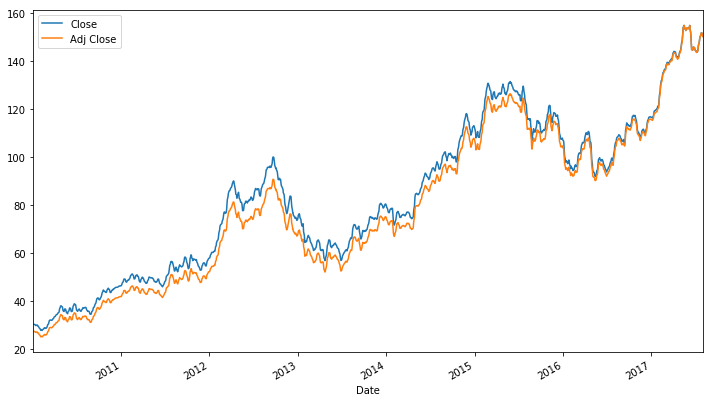

In [ ]:
aapl.rolling(5)[['Close', 'Adj Close']].mean().plot();

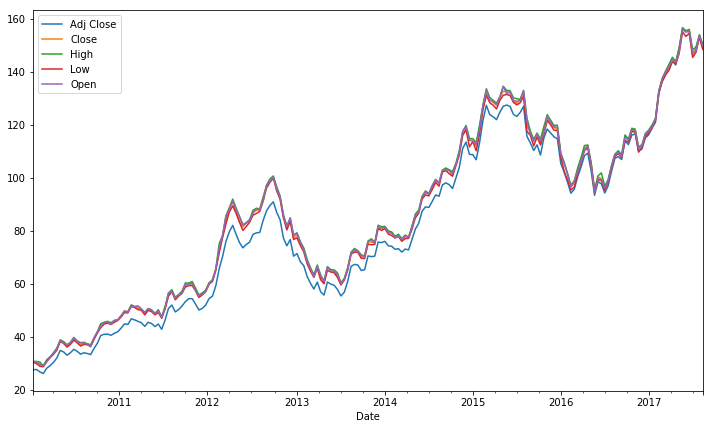

In [ ]:
# Drop `Volume`, since it's way bigger than everything else.
aapl.drop('Volume', axis=1).resample('2W').max().plot();

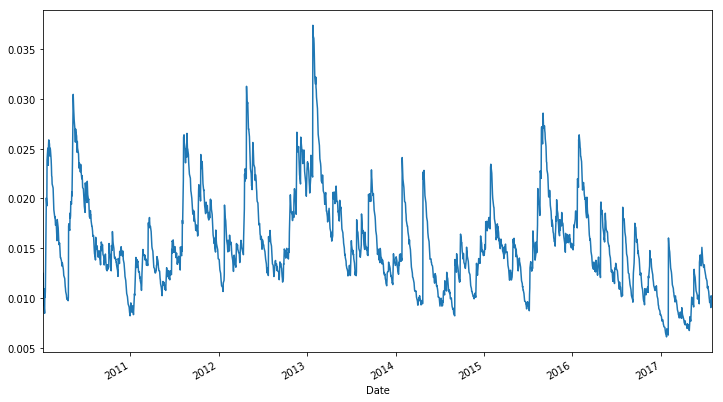

In [ ]:
# 30-day rolling exponentially-weighted stddev of returns.
aapl['Close'].pct_change().ewm(span=30).std().plot();

# "Real World" Data

In [ ]:
from demos.avocados import read_avocadata

avocados = read_avocadata('2014', '2016')
avocados.head()

,Date,Region,Variety,Organic,Number of Stores,Weighted Avg Price,Low Price,High Price
0,2014-01-03 00:00:00+00:00,NATIONAL,HASS,False,9184,0.93,NaN,NaN
1,2014-01-03 00:00:00+00:00,NATIONAL,HASS,True,872,1.44,NaN,NaN
2,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,False,1449,1.08,0.5,1.67
3,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,True,66,1.54,1.5,2.00
4,2014-01-03 00:00:00+00:00,SOUTHEAST,HASS,False,2286,0.98,0.5,1.99


In [ ]:
# Unlike numpy arrays, pandas DataFrames can have a different dtype for each column.
avocados.dtypes

Date                  datetime64[ns, UTC]
Region                             object
Variety                            object
Organic                              bool
Number of Stores                    int64
Weighted Avg Price                float64
Low Price                         float64
High Price                        float64
dtype: object

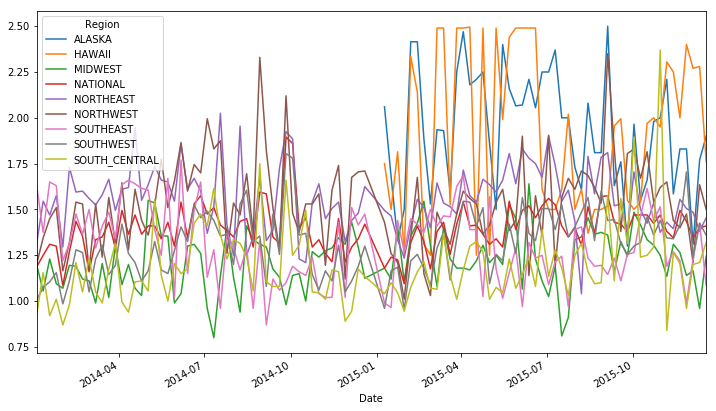

In [ ]:
# What's the regional average price of a HASS avocado every day?
hass = avocados[avocados.Variety == 'HASS']
hass.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

In [ ]:
def _organic_spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)

    is_organic = group.columns.get_level_values('Organic').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def organic_spread_by_region(df):
    """What's the difference between the price of an organic
    and non-organic avocado within each region?
    """
    return (
        df
        .set_index(['Date', 'Region', 'Organic'])
         ['Weighted Avg Price']
        .unstack(level=['Region', 'Organic'])
        .ffill()
        .groupby(level='Region', axis=1)
        .apply(_organic_spread)
    )

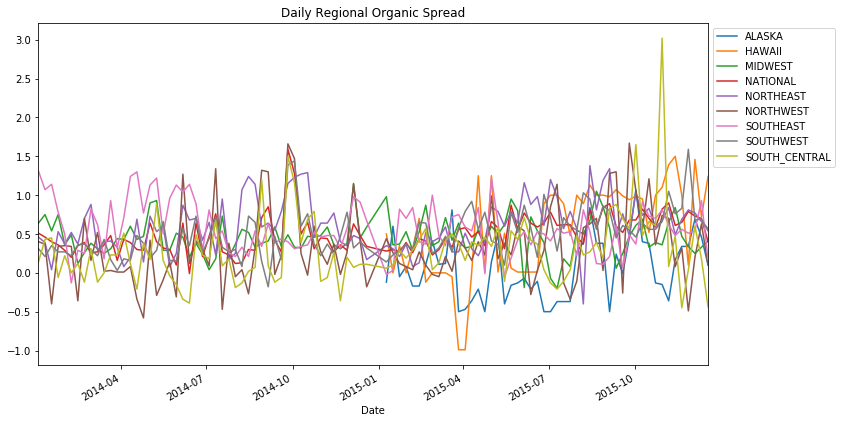

In [ ]:
organic_spread_by_region(hass).plot();
plt.gca().set_title("Daily Regional Organic Spread");
plt.legend(bbox_to_anchor=(1, 1));

In [ ]:
spread_correlation = organic_spread_by_region(hass).corr()
spread_correlation

Region,ALASKA,HAWAII,MIDWEST,NATIONAL,NORTHEAST,NORTHWEST,SOUTHEAST,SOUTHWEST,SOUTH_CENTRAL
Region,,,,,,,,,
ALASKA,1.000000,0.202723,0.175251,0.007844,0.051049,0.087575,0.129079,-0.070868,0.161624
HAWAII,0.202723,1.000000,-0.021116,0.373914,0.247171,0.341155,0.019388,0.159192,0.092632
MIDWEST,0.175251,-0.021116,1.000000,0.062595,-0.010213,-0.043783,0.047437,-0.059128,0.068902
NATIONAL,0.007844,0.373914,0.062595,1.000000,0.502035,0.579102,-0.040539,0.635006,0.486524
NORTHEAST,0.051049,0.247171,-0.010213,0.502035,1.000000,0.242039,-0.236225,0.360389,0.149881
NORTHWEST,0.087575,0.341155,-0.043783,0.579102,0.242039,1.000000,-0.032306,0.165992,0.349935
SOUTHEAST,0.129079,0.019388,0.047437,-0.040539,-0.236225,-0.032306,1.000000,-0.167631,-0.021176
SOUTHWEST,-0.070868,0.159192,-0.059128,0.635006,0.360389,0.165992,-0.167631,1.000000,0.254504
SOUTH_CENTRAL,0.161624,0.092632,0.068902,0.486524,0.149881,0.349935,-0.021176,0.254504,1.000000


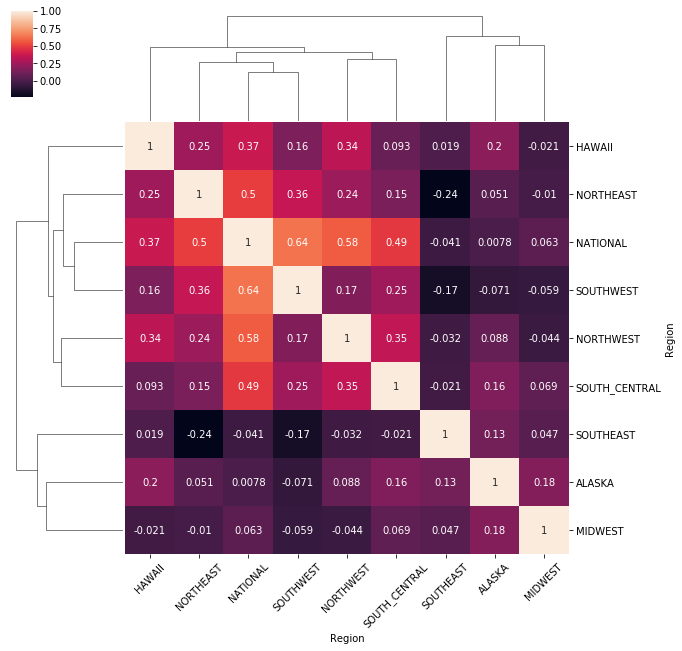

In [ ]:
import seaborn as sns
grid = sns.clustermap(spread_correlation, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

Los datos presentados corresponden al reporte de delitos informáticos, "comprendidos en el Título VII BIS “De la protección de la información y de los datos” del Código Penal Colombiano".

Los datos provienen de la página [Datos Abiertos](https://www.datos.gov.co/) y la última actualización del reporte fue el 21 de octubre de 2024.

[Delitos Informáticos.](https://www.datos.gov.co/Seguridad-y-Defensa/DELITOS-INFORM-TICOS/4v6r-wu98/data_preview)

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
delitos_informaticos = pd.read_csv('/content/sample_data/delitos_informaticos.csv')
delitos_informaticos.head()

,FECHA HECHO,COD_DEPTO,DEPARTAMENTO,COD_MUNI,MUNICIPIO,DESCRIPCION CONDUCTA,CANTIDAD
0,05/13/2006 12:00:00 AM,11,BOGOTA D.C.,11001,BOGOTA D.C.,ARTICULO 269I. HURTO POR MEDIOS INFORMATICOS Y...,1
1,10/06/2006 12:00:00 AM,11,BOGOTA D.C.,11001,BOGOTA D.C.,ARTICULO 269A. ACCESO ABUSIVO A UN SISTEMA INF...,1
2,05/24/2008 12:00:00 AM,11,BOGOTA D.C.,11001,BOGOTA D.C.,ARTICULO 269A. ACCESO ABUSIVO A UN SISTEMA INF...,1
3,01/01/2009 12:00:00 AM,41,HUILA,41001,NEIVA,ARTICULO 269F. VIOLACION DE DATOS PERSONALES,1
4,01/02/2009 12:00:00 AM,11,BOGOTA D.C.,11001,BOGOTA D.C.,ARTICULO 269A. ACCESO ABUSIVO A UN SISTEMA INF...,1


In [ ]:
delitos_informaticos.dtypes

,0
FECHA HECHO,object
COD_DEPTO,int64
DEPARTAMENTO,object
COD_MUNI,int64
MUNICIPIO,object
DESCRIPCION CONDUCTA,object
CANTIDAD,int64


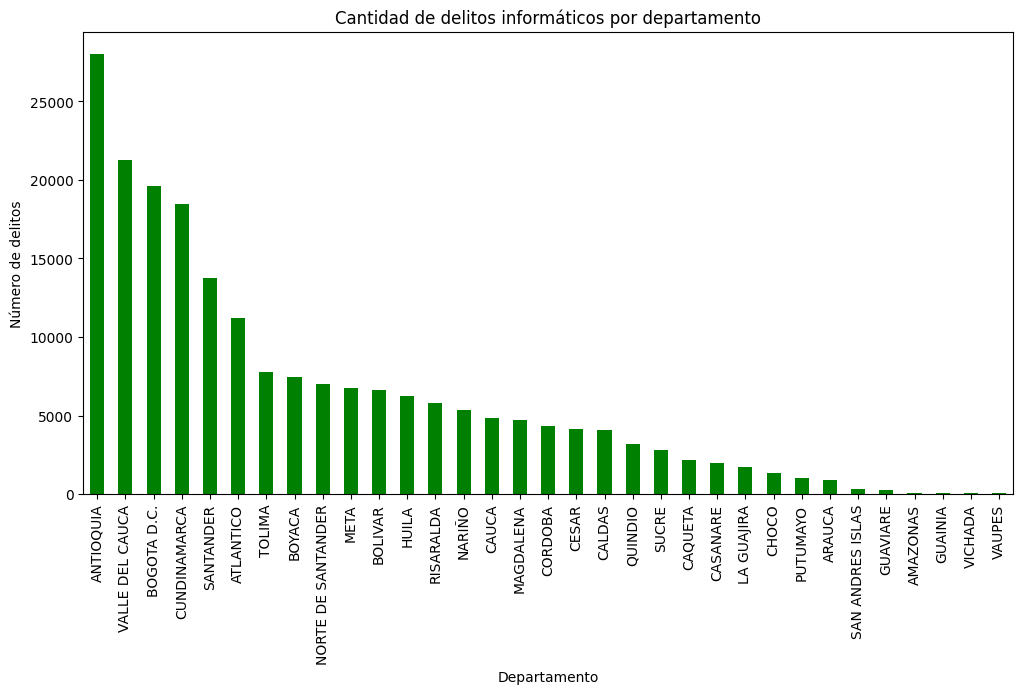

In [ ]:
#delitos por departamento

crime_type_department = delitos_informaticos.groupby(['DEPARTAMENTO', 'DESCRIPCION CONDUCTA']).size()

crime_type_department = crime_type_department.reset_index(name='COUNT')

crime_by_department = crime_type_department.groupby('DEPARTAMENTO')['COUNT'].sum().sort_values(ascending=False)

crime_by_department.plot(kind='bar', figsize=(12, 6), title='Cantidad de delitos informáticos por departamento', color='green');

plt.xlabel('Departamento')
plt.ylabel('Número de delitos');

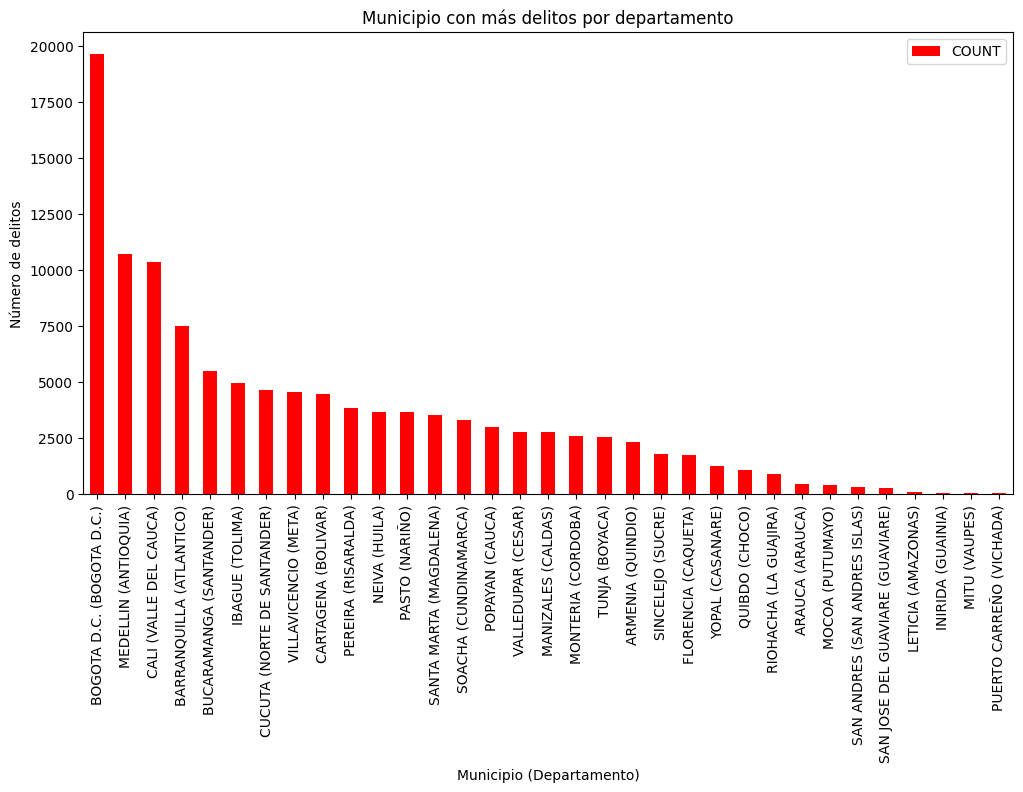

In [ ]:
# Municipio con más delitos por departamento
crime_type_municipio = delitos_informaticos.groupby(['DEPARTAMENTO', 'MUNICIPIO']).size().reset_index(name='COUNT')

max_crime_by_municipio = crime_type_municipio.loc[crime_type_municipio.groupby('DEPARTAMENTO')['COUNT'].idxmax()]

max_crime_by_municipio = max_crime_by_municipio.sort_values(by='COUNT', ascending=False)

# columna que combina el municipio y el departamento
max_crime_by_municipio['LABEL'] = max_crime_by_municipio['MUNICIPIO'] + ' (' + max_crime_by_municipio['DEPARTAMENTO'] + ')'

max_crime_by_municipio.plot(kind='bar', x='LABEL', y='COUNT', figsize=(12, 6), title='Municipio con más delitos por departamento', color='red');

plt.xlabel('Municipio (Departamento)')
plt.ylabel('Número de delitos');


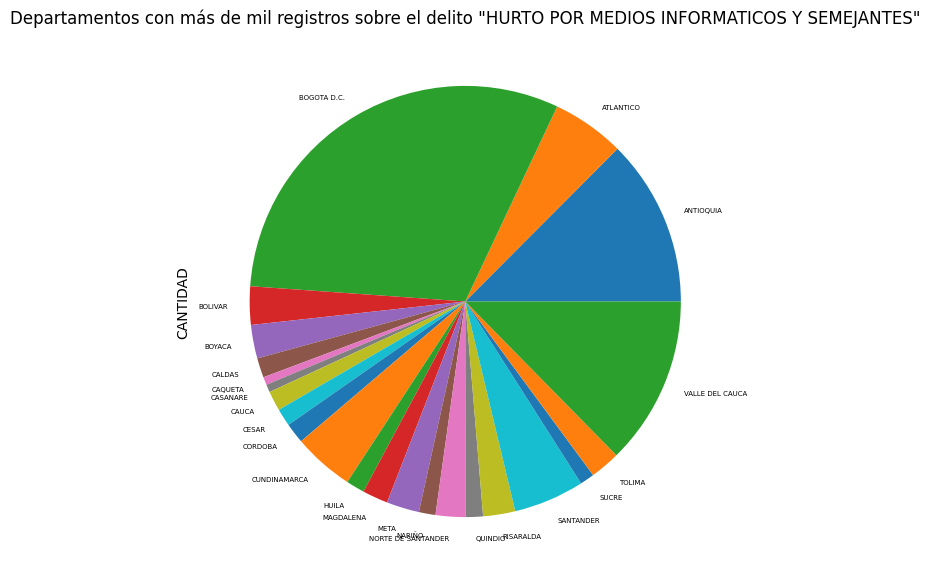

In [ ]:
# Departamentos con más de mil registros sobre el delito "hurto por medios informáticos y semejantes"
crimen = delitos_informaticos[
    (delitos_informaticos['DESCRIPCION CONDUCTA'] == 'ARTICULO 269I. HURTO POR MEDIOS INFORMATICOS Y SEMEJANTES')]
crimen_agrupado = crimen.groupby('DEPARTAMENTO')['CANTIDAD'].sum()

crimen_agrupado_filtrado = crimen_agrupado[crimen_agrupado > 1000]

crimen_agrupado_filtrado.plot(kind='pie', figsize=(10, 7), title='Departamentos con más de mil registros sobre el delito "HURTO POR MEDIOS INFORMATICOS Y SEMEJANTES"', textprops={'fontsize': 5});


# Pandas Review

- Pandas extends numpy with more complex datastructures and algorithms.
- If you understand numpy, you understand 90% of pandas.
- `groupby`, `set_index`, and `unstack` are powerful tools for working with categorical data.
- Avocado prices are surprisingly interesting :)

# Thanks!